In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv('homeprices_banglore.csv')
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [40]:
x = df[['area','bedrooms']]
y = df['price']

In [41]:
y.shape

(20,)

In [42]:
x_scaled = MinMaxScaler()
y_scaled = MinMaxScaler()

In [43]:
x = x_scaled.fit_transform(x)
x.shape

(20, 2)

In [44]:
y = y_scaled.fit_transform(y.values.reshape(df.shape[0],1))
y.shape

(20, 1)

# Batch Gradient Descent

In [45]:
def batch_grad(x, y, epochs, l_rate):

    cost_list = []
    epochs_list = []

    total_features = x.shape[1]

    w = np.ones(shape=total_features)
    b = 0

    total_samples = x.shape[0]

    for i in range(epochs):
        y_predicted =  np.dot(x, w) + b

        w_pdev = -(2/total_samples) * np.dot(x.T, (y - y_predicted))
        b_pdev = -(2/total_samples) * np.sum(y - y_predicted)

        w = w - l_rate * w_pdev
        b = b - l_rate * b_pdev

        cost = np.mean(np.square(y - y_predicted))

        if i%10 == 0:
            cost_list.append(cost)
            epochs_list.append(i)

    return w , b, cost, cost_list, epochs_list

In [46]:
w,b,cost,cost_list,epochs_list = batch_grad(x,y.flatten(),1000,0.01)
w,b,cost

(array([0.66469087, 0.60541671]), -0.17792104056392882, 0.0048654808183488454)

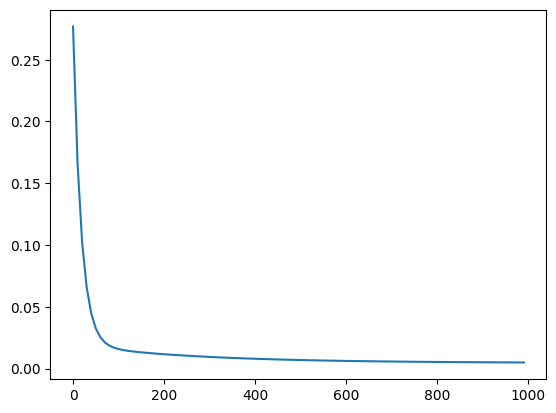

In [47]:
plt.plot(epochs_list, cost_list)
plt.show()

In [48]:
def predict(area, bedrooms, w = w, b = b):
    x = x_scaled.transform([[area, bedrooms]])[0]
    y = x[0]*w[0] + x[1]*w[1] + b
    price = y_scaled.inverse_transform([[y]])[0][0]
    return price    

In [49]:
predict(2600,4)

124.97561189905038

# Stochastic Gradient Descent

In [50]:
import random

In [51]:
def stochastic_grad(x, y, epochs, l_rate):
    cost_list = []
    epochs_list = []

    total_features = x.shape[1]

    w = np.ones(shape=total_features)
    b = 0

    total_samples = x.shape[0]

    for i in range(epochs):
        random_index = random.randint(0, total_samples-1)
        random_x = x[random_index]
        random_y = y[random_index]

        y_predicted =  np.dot(random_x, w) + b

        w_pdev = -(2/total_samples) * np.dot(random_x.T, (random_y - y_predicted))
        b_pdev = -(2/total_samples) * np.sum(random_y - y_predicted)

        w = w - l_rate * w_pdev
        b = b - l_rate * b_pdev

        cost = np.mean(np.square(random_y - y_predicted))

        if i%10 == 0:
            cost_list.append(cost)
            epochs_list.append(i)

    return w , b, cost, cost_list, epochs_list

        

In [52]:
w2,b2,cost2,cost_list2,epochs_list2 = stochastic_grad(x,y.flatten(),2000,0.01)
w2,b2,cost2

(array([0.8183739 , 0.78938291]), -0.3002566079611391, 3.932489324150426e-05)

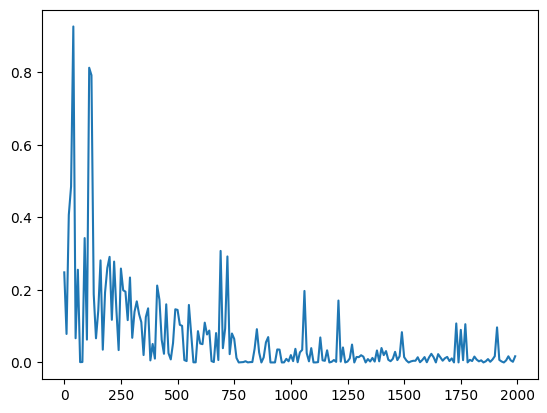

In [54]:
plt.plot(epochs_list2, cost_list2)
plt.show()

In [55]:
predict(2600,4, w=w2, b=b2)

139.96446612024525

# Mini Gradient Descent

In [56]:
def mini_grad(x, y, epochs, l_rate):
    cost_list = []
    epochs_list = []

    total_features = x.shape[1]

    w = np.ones(shape=total_features)
    b = 0

    total_samples = x.shape[0]

    for i in range(epochs):
        random_indices = np.random.choice(x.shape[0], 3, replace=False)
        
        random_x = x[random_indices]
        random_y = y[random_indices]

        y_predicted =  np.dot(random_x, w) + b

        w_pdev = -(2/total_samples) * np.dot(random_x.T, (random_y - y_predicted))
        b_pdev = -(2/total_samples) * np.sum(random_y - y_predicted)

        w = w - l_rate * w_pdev
        b = b - l_rate * b_pdev

        cost = np.mean(np.square(random_y - y_predicted))

        if i%10 == 0:
            cost_list.append(cost)
            epochs_list.append(i)

    return w , b, cost, cost_list, epochs_list
        


In [57]:
w3,b3,cost3,cost_list3,epochs_list3 = mini_grad(x,y.flatten(),2000,0.01)
w3,b3,cost3

(array([0.7483099 , 0.71934957]), -0.2704329328610145, 0.004479792304181953)

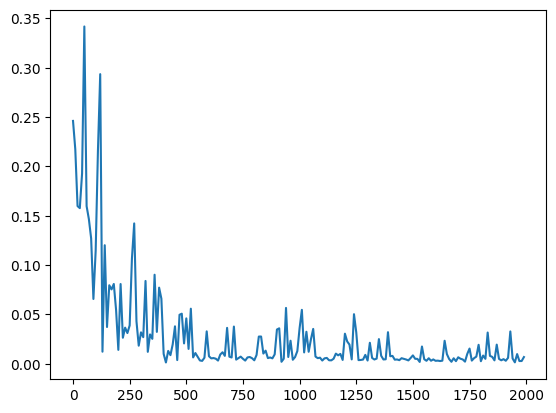

In [58]:
plt.plot(epochs_list3, cost_list3)
plt.show()

In [59]:
predict(2600,4,w=w3,b=b3)

131.02890626829128